# Data Science Masters :Assignment 29


# Problem:
To compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference.

# Solution: 

Importing Libraries...

In [1]:
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
%matplotlib inline

# modules for Machine Learning
from sklearn import cluster, datasets 
from scipy import misc 
from skimage.measure import compare_ssim as ssim 

In [2]:
# Load Image
racoon_image = misc.face(gray=True)
racoon_image

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

Image


<Figure size 432x288 with 0 Axes>

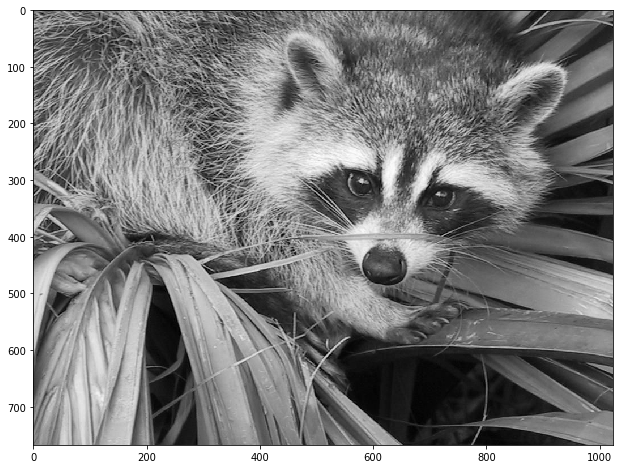

In [3]:
# Data Exploration
# Display Image 
print("Image")
plt.gray()
plt.figure(figsize=(12,8))
plt.imshow(racoon_image)
plt.show()

In [4]:
print("Image Dimension: ",racoon_image.ndim)
print("Image Datatype :", racoon_image.dtype)
print("Image Shape:",racoon_image.shape)

Image Dimension:  2
Image Datatype : uint8
Image Shape: (768, 1024)


### Data Modeling - K-Means Clustering for Iamge compression

In [5]:
no_of_clusters = 5
# Reshaping of image (Converting image in to 1-D array)
racoon_image_data=racoon_image.reshape(racoon_image.shape[0]*racoon_image.shape[1],1)
racoon_image_data

array([[114],
       [130],
       [145],
       ...,
       [142],
       [141],
       [140]], dtype=uint8)

In [7]:
from sklearn.cluster import KMeans
# setting parameters
K_means_Cluster = KMeans (n_clusters= no_of_clusters  , algorithm='auto' , n_init= 15 , max_iter= 300 , n_jobs= -1 , init='k-means++' ,random_state=10)
K_means_Cluster.fit(X=racoon_image_data )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=15, n_jobs=-1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [8]:
# Cluster Numbers
k_Centers =K_means_Cluster.cluster_centers_
k_Centers

array([[194.79152399],
       [ 73.91549783],
       [113.57006678],
       [ 27.11166441],
       [153.24120581]])

In [9]:
# Cluster Labels
k_labels =K_means_Cluster.labels_
k_labels

array([2, 2, 4, ..., 4, 4, 4])

In [14]:
# Array creation of cluster numbers and labels
compresed_racoon_image = np.choose(k_labels , k_Centers)
compresed_racoon_image.shape = racoon_image.shape

 Compressed Image


<Figure size 432x288 with 0 Axes>

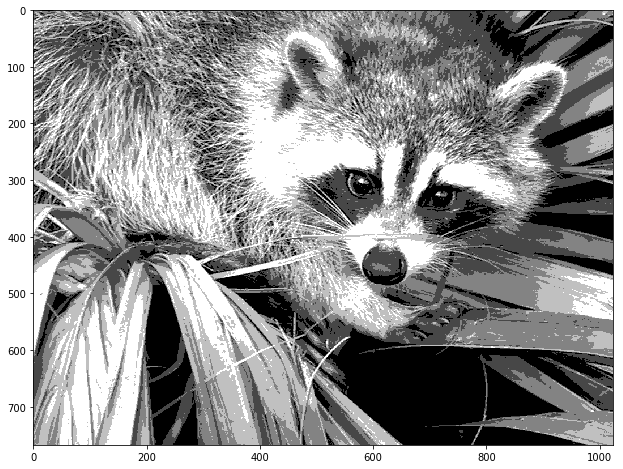

In [15]:
# Visualising image
print(" Compressed Image")
plt.gray()
plt.figure(figsize=(12,8))
plt.imshow(compresed_racoon_image)
plt.show()

(-0.5, 1023.5, 767.5, -0.5)

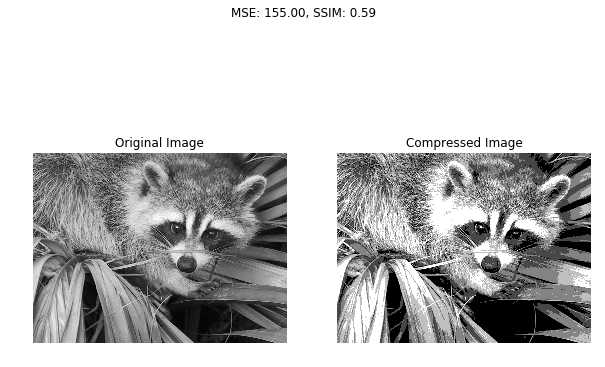

In [23]:
# Image Comparison
mse = np.sum((racoon_image.astype("float") - compresed_racoon_image.astype("float")) ** 2)
mse /= float(racoon_image.shape[0] * compresed_racoon_image.shape[1])
#s = ssim(image.astype('float'), com_image.astype('float'))
fig = plt.figure("Comparison" , figsize=(10,7))
plt.suptitle("MSE: %.2f, SSIM: %.2f" % (mse, ssim(racoon_image.astype('float'), compresed_racoon_image.astype('float'))))
# show Original
ax = fig.add_subplot(1, 2, 1)
ax.set_title("Original Image")
plt.imshow(racoon_image, cmap = plt.cm.gray)
plt.axis("off")
# show Compressed
ax = fig.add_subplot(1, 2, 2)
ax.set_title("Compressed Image")
plt.imshow(compresed_racoon_image, cmap = plt.cm.gray)
plt.axis("off")